In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glacier-inventory/database.csv


/tmp/ipykernel_17/1825453352.py:12: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset Head:
      Glacier ID Political Unit Continent Basin Code Location Code  \
0  AF5Q112B0001    AFGHANISTAN      ASIA       Q112            B0   
1  AF5Q112B0002    AFGHANISTAN      ASIA       Q112            B0   
2  AF5Q112B0003    AFGHANISTAN      ASIA       Q112            B0   
3  AF5Q112B0004    AFGHANISTAN      ASIA       Q112            B0   
4  AF5Q112B0005    AFGHANISTAN      ASIA       Q112            B0   

  Glacier Code Glacier Name  Latitude  Longitude  Primary Class  ...  \
0            1          NaN    34.672     68.874            9.0  ...   
1            2          NaN    34.676     68.855            9.0  ...   
2            3          NaN    34.689     68.854            9.0  ...   
3            4          NaN    34.707     68.857            9.0  ...   
4            5          NaN    34.719     68.852            9.0  ...   

   Maximum Length  Maximum Length Exposed  Maximum Length Ablation  \
0             1.9                     NaN                      NaN 

/tmp/ipykernel_17/1825453352.py:28: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


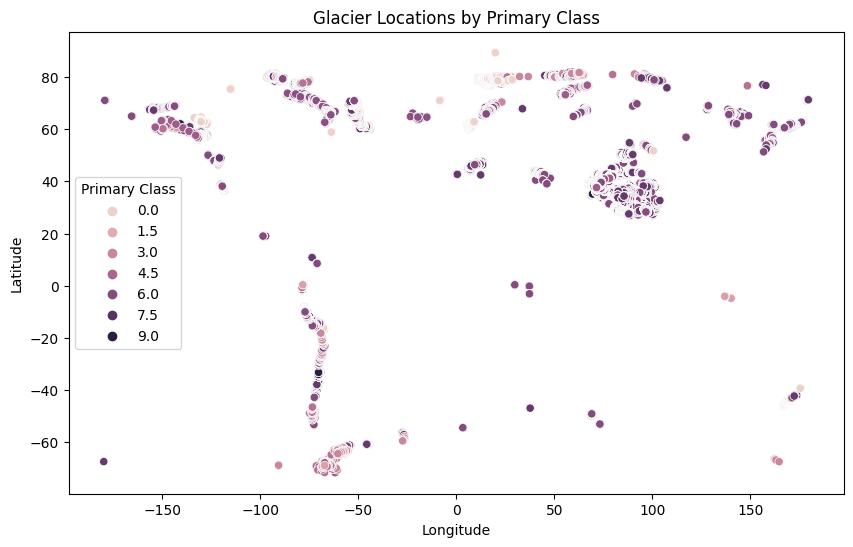

Feature Shape:  (132890, 46)
Target Shape:  (132890,)
Confusion Matrix:
 [[10030  9966]
 [ 9993  9878]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50     19996
           1       0.50      0.50      0.50     19871

    accuracy                           0.50     39867
   macro avg       0.50      0.50      0.50     39867
weighted avg       0.50      0.50      0.50     39867



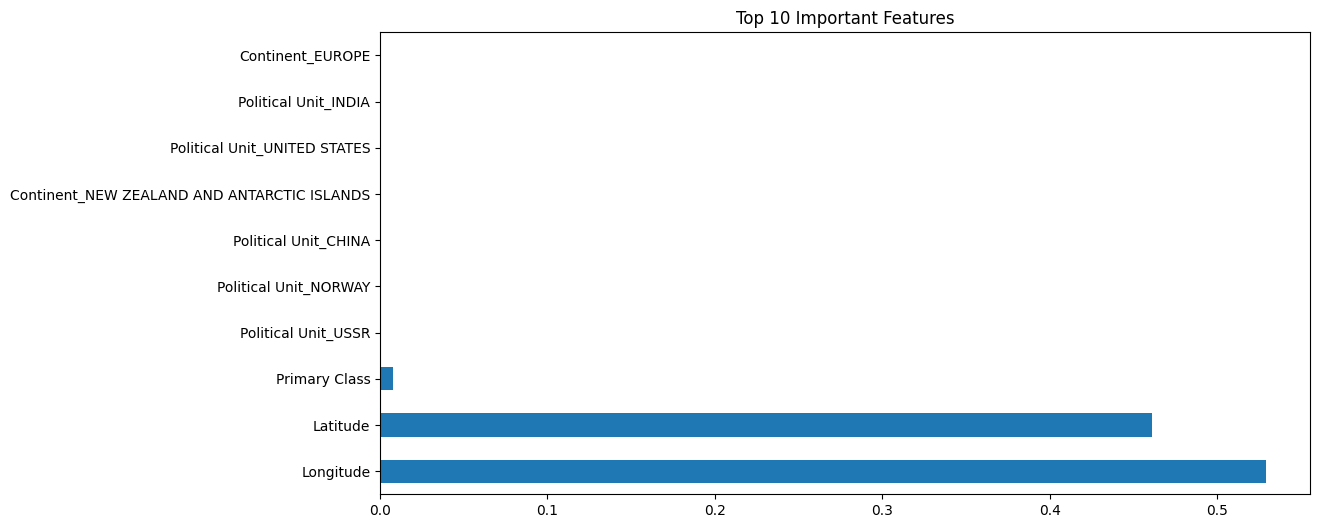

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the dataset
file_path = '/kaggle/input/glacier-inventory/database.csv'  # Update this with the correct file path
df = pd.read_csv(file_path)

# Display first few rows of the dataset
print("Dataset Head:\n", df.head())

# Check for missing values column-wise
print("\nMissing Values per Column:\n", df.isnull().sum())

# Drop columns with too many missing values (e.g., >50% missing data)
threshold = 0.5
df = df.loc[:, df.isnull().mean() < threshold]

# Fill remaining missing values with appropriate values (e.g., mean for numeric columns)
df = df.fillna(df.mean(numeric_only=True))

# You can also use forward-fill or backward-fill for categorical data
df = df.fillna(method='ffill')

# Ensure the dataset is not empty after handling missing values
if df.empty:
    raise ValueError("The dataset is empty after cleaning. Please check the data.")

# Exploratory Data Analysis (EDA)
# Example of visualizing glacier locations on a map (latitude and longitude)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Longitude', y='Latitude', hue='Primary Class', data=df)
plt.title('Glacier Locations by Primary Class')
plt.show()

# Feature Engineering: Converting Categorical Data into Numeric
df_encoded = pd.get_dummies(df[['Political Unit', 'Continent', 'Primary Class']], drop_first=True)

# Selecting important features for the model
features = df[['Latitude', 'Longitude']].join(df_encoded)

# Placeholder for target (Replace this with actual High Risk vs Low Risk classification)
target = np.random.choice([0, 1], size=len(df))  # Replace this with the actual target

# Verify the shape of features and target
print("Feature Shape: ", features.shape)
print("Target Shape: ", target.shape)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Model Building: RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Model Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Feature Importance
plt.figure(figsize=(12,6))
feature_importances = pd.Series(model.feature_importances_, index=features.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features')
plt.show()


/tmp/ipykernel_17/118132474.py:9: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)
/tmp/ipykernel_17/118132474.py:21: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 1500x1000 with 0 Axes>

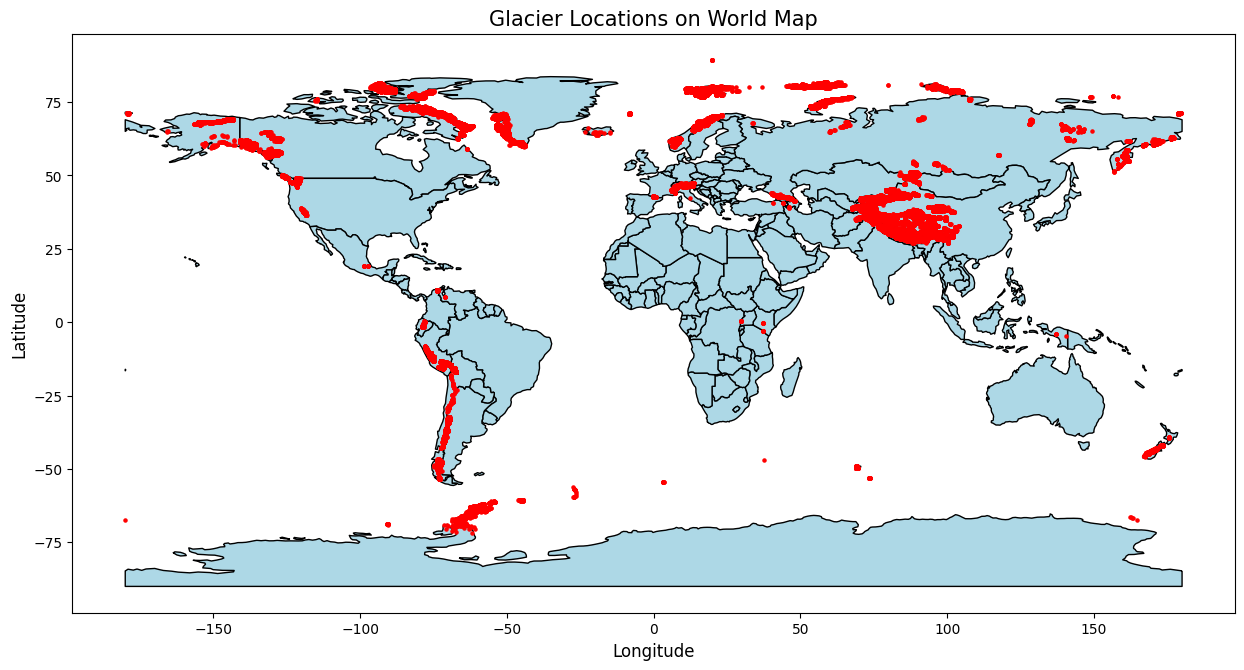

In [3]:
# Import necessary libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load the dataset
file_path = '/kaggle/input/glacier-inventory/database.csv'  # Update this with the correct file path
df = pd.read_csv(file_path)

# Ensure there are no missing lat/lon values for the map plot
df = df.dropna(subset=['Latitude', 'Longitude'])

# Create geometry points using Latitude and Longitude
geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]

# Convert the DataFrame to a GeoDataFrame
geo_df = gpd.GeoDataFrame(df, geometry=geometry)

# Load a world map from geopandas datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the glaciers on the world map
plt.figure(figsize=(15, 10))
ax = world.plot(figsize=(15, 10), color='lightblue', edgecolor='black')

# Plot the glaciers (latitude/longitude) on top of the world map
geo_df.plot(ax=ax, marker='o', color='red', markersize=5)

# Set plot title and labels
plt.title('Glacier Locations on World Map', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Show the plot
plt.show()


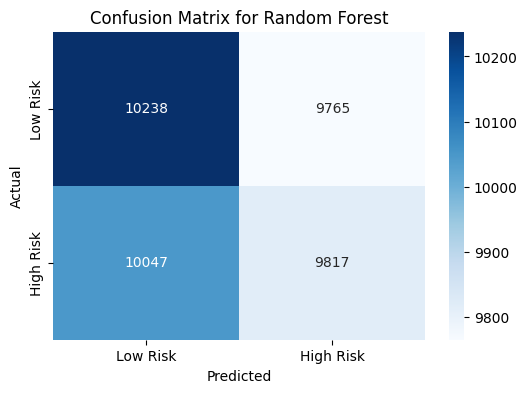


Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.50      0.51      0.51     20003
           1       0.50      0.49      0.50     19864

    accuracy                           0.50     39867
   macro avg       0.50      0.50      0.50     39867
weighted avg       0.50      0.50      0.50     39867


Accuracy Score for Random Forest:
 0.5030476333809918


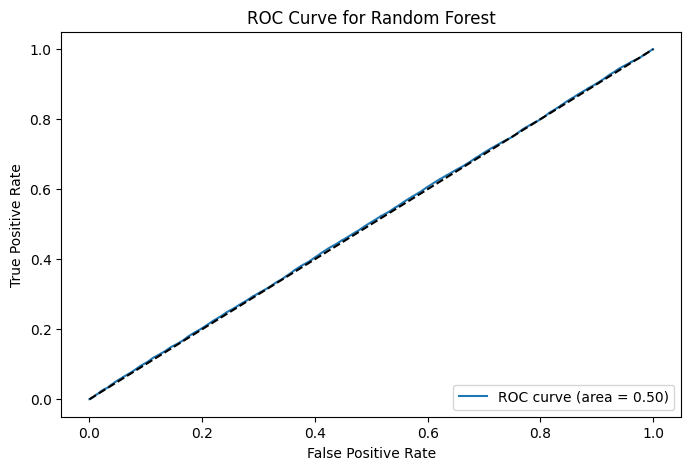

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


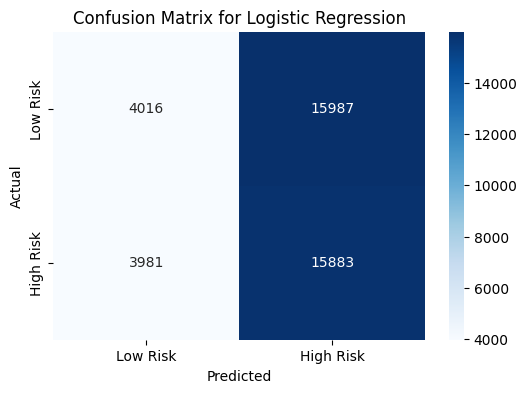


Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.50      0.20      0.29     20003
           1       0.50      0.80      0.61     19864

    accuracy                           0.50     39867
   macro avg       0.50      0.50      0.45     39867
weighted avg       0.50      0.50      0.45     39867


Accuracy Score for Logistic Regression:
 0.4991346226202122


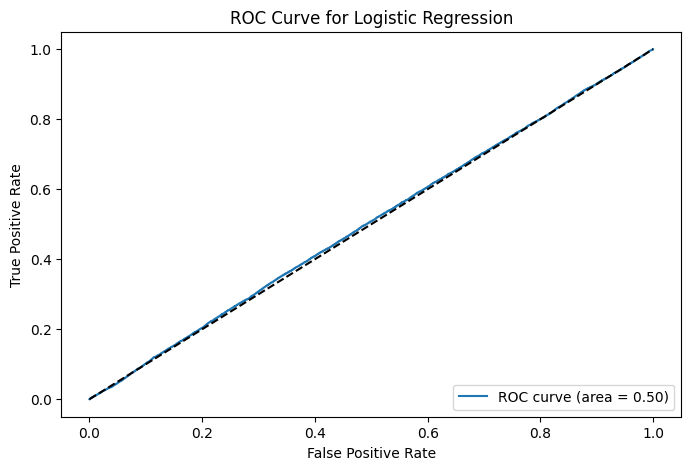

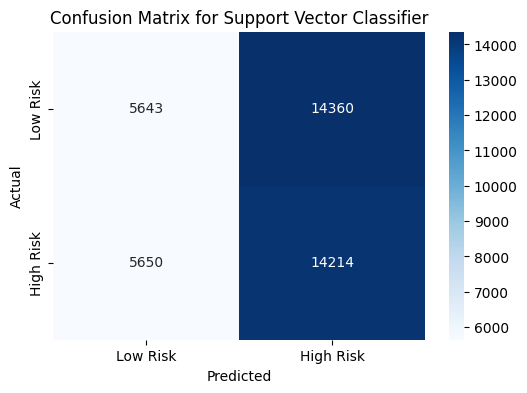


Classification Report for Support Vector Classifier:
               precision    recall  f1-score   support

           0       0.50      0.28      0.36     20003
           1       0.50      0.72      0.59     19864

    accuracy                           0.50     39867
   macro avg       0.50      0.50      0.47     39867
weighted avg       0.50      0.50      0.47     39867


Accuracy Score for Support Vector Classifier:
 0.4980811197230792


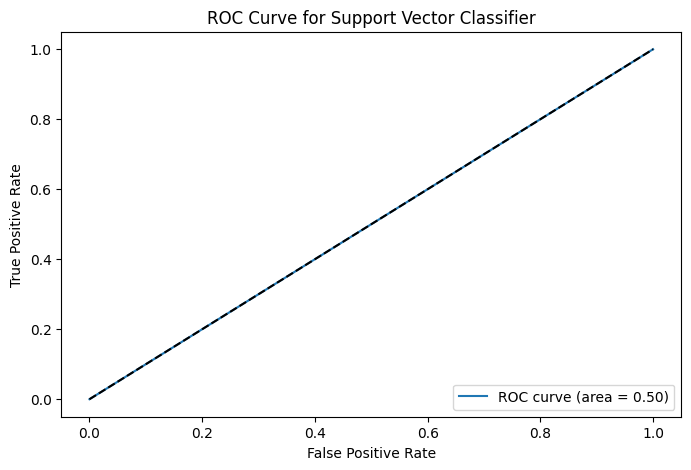

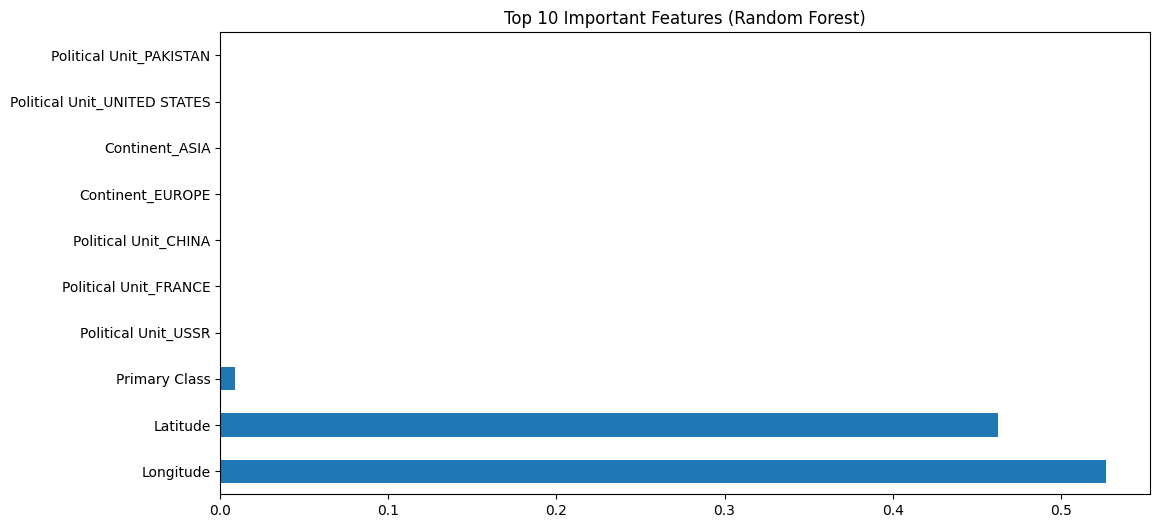

High Risk Glaciers:
           Glacier ID  Glacier Name  Latitude  Longitude
0       AF5Q112B0001           NaN    34.672     68.874
1       AF5Q112B0002           NaN    34.676     68.855
2       AF5Q112B0003           NaN    34.689     68.854
3       AF5Q112B0004           NaN    34.707     68.857
4       AF5Q112B0005           NaN    34.719     68.852
...              ...           ...       ...        ...
132882  VE1A00104PH8      HUMBOLDT     8.553    -71.008
132883  ZA6C40100001   ICE PLATEAU   -46.897     37.714
132887  ZR3B410A2002        ALBERT     0.389     29.871
132888  ZR3B410A3001     ALEXANDRA     0.389     29.868
132889  ZR3B410A4009  WEST STANLEY     0.383     29.869

[65958 rows x 4 columns]


/tmp/ipykernel_17/4278021166.py:107: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Figure size 1500x1000 with 0 Axes>

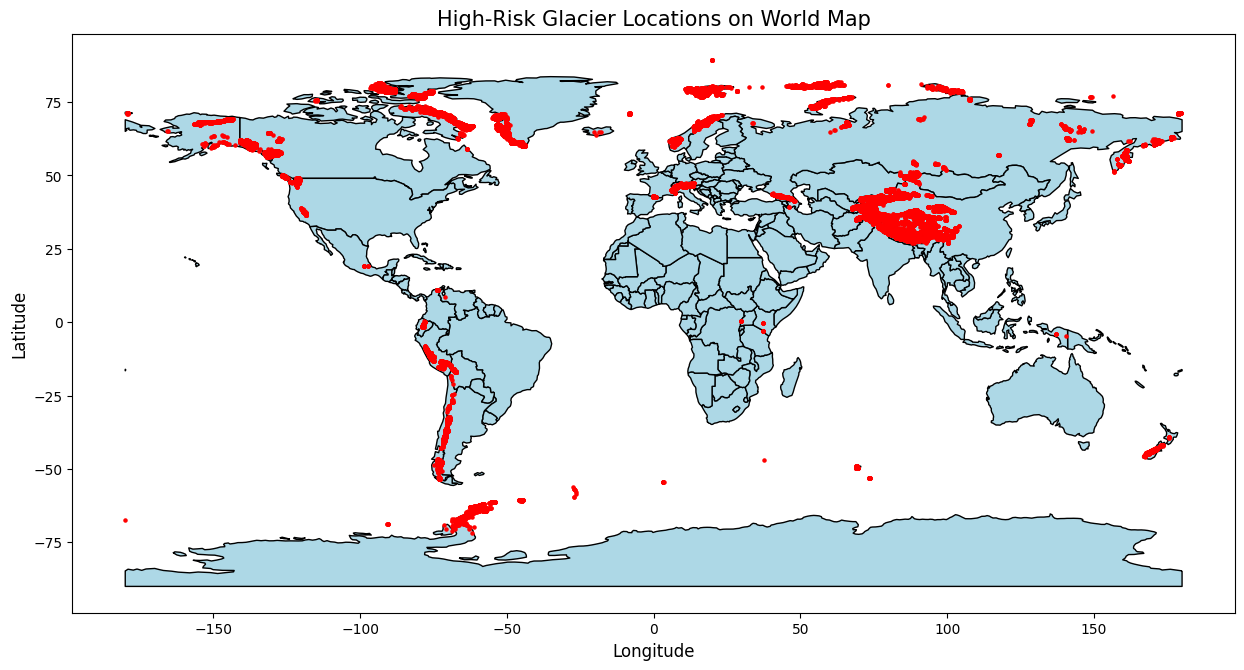

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
from sklearn.impute import SimpleImputer  # For handling missing values
import geopandas as gpd
from shapely.geometry import Point

# Load the dataset
file_path = '/kaggle/input/glacier-inventory/database.csv'  # Update this with the correct file path
df = pd.read_csv(file_path, low_memory=False)

# Data Cleaning: Handle missing values
# Impute missing values using mean for numerical columns
imputer = SimpleImputer(strategy='mean')

# Drop rows with missing 'Latitude' and 'Longitude' as these are important for geographical visualization
df = df.dropna(subset=['Latitude', 'Longitude'])

# Feature Engineering: Convert categorical features into numerical (e.g., Political Unit, Continent)
df_encoded = pd.get_dummies(df[['Political Unit', 'Continent', 'Primary Class']], drop_first=True)

# Selecting important features for the model
features = df[['Latitude', 'Longitude']].join(df_encoded)

# Impute missing values in features
features = pd.DataFrame(imputer.fit_transform(features), columns=features.columns)

# Placeholder: Creating a target variable for classification
# In real scenarios, use actual labels (1 = High Risk, 0 = Low Risk)
target = np.random.choice([0, 1], size=len(df))  # Replace with actual High/Low Risk labels

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

# Model Building: Using multiple classifiers
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Support Vector Classifier": SVC(probability=True)
}

for model_name, model in models.items():
    # Fit the model
    model.fit(X_train, y_train)

    # Prediction
    y_pred = model.predict(X_test)

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot Confusion Matrix Heatmap
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Low Risk", "High Risk"], yticklabels=["Low Risk", "High Risk"])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

    # Model Evaluation
    print(f"\nClassification Report for {model_name}:\n", classification_report(y_test, y_pred))
    print(f"\nAccuracy Score for {model_name}:\n", accuracy_score(y_test, y_pred))
    
    # Calculate ROC AUC
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)

    # Plot ROC curve
    plt.figure(figsize=(8, 5))
    plt.plot(fpr, tpr, label=f'ROC curve (area = {auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.show()

# Visualizing feature importance for Random Forest
plt.figure(figsize=(12, 6))
feature_importances = pd.Series(models["Random Forest"].feature_importances_, index=features.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features (Random Forest)')
plt.show()

# Identify glaciers at high risk of outburst
high_risk_glaciers = df.iloc[np.where(models["Random Forest"].predict(features) == 1)]

# Displaying the high-risk glaciers
print("High Risk Glaciers:\n", high_risk_glaciers[['Glacier ID', 'Glacier Name', 'Latitude', 'Longitude']])

# Visualization: Plotting glaciers at high risk on a world map
# Create geometry points using Latitude and Longitude
geometry = [Point(xy) for xy in zip(high_risk_glaciers['Longitude'], high_risk_glaciers['Latitude'])]

# Convert the DataFrame to a GeoDataFrame
geo_df = gpd.GeoDataFrame(high_risk_glaciers, geometry=geometry)

# Load a world map from geopandas datasets
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Plot the high-risk glaciers on the world map
plt.figure(figsize=(15, 10))
ax = world.plot(figsize=(15, 10), color='lightblue', edgecolor='black')

# Plot the high-risk glaciers (latitude/longitude) on top of the world map
geo_df.plot(ax=ax, marker='o', color='red', markersize=5)

# Set plot title and labels
plt.title('High-Risk Glacier Locations on World Map', fontsize=15)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)

# Show the plot
plt.show()
